### Python Project EDA & DATA Vis -Airbnb listing 2024(New York)


**steps**


1.Importing all dependencies
2.Loading datasets
3.Initial Exploration
4.Data Cleaning
5.Data Analysis


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### TASK 2: Loading Datasets

In [2]:
data = pd.read_csv('/Users/aryanraj/Desktop/python/project/datasets.csv', encoding_errors= 'ignore')

### Task 3: Initial Exploration

In [3]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1


In [4]:
data.shape

(20770, 22)

In [5]:
# Rating conversion
data['rating_numeric'] = pd.to_numeric(data['rating'], errors='coerce')


In [6]:
data.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
rating_numeric                    float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [8]:
#stastical summary
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds,rating_numeric
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000,17016.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592,4.734206
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993,0.294373
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000,1.750000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000,4.640000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000,4.810000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000,4.930000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000,5.000000


### Task 4 Data Cleaning

In [9]:
data.isnull().sum()
#dropping null val
data.dropna(inplace = True)

In [10]:
data.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
rating_numeric                    0
dtype: int64

In [11]:
data.shape

(16984, 23)

In [12]:
#dealing with duplicate
data.duplicated().sum()

np.int64(10)

In [13]:
data[data.duplicated()]
data.drop_duplicates(inplace=True)

In [14]:
#typecasting
data.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
rating_numeric                    float64
dtype: object

In [15]:
data['id'] = data['id'].astype(object)
data['host_id'] = data['host_id'].astype(object)

In [16]:
# Bedrooms cleaning
data['bedrooms_clean'] = data['bedrooms'].replace('Studio', 0)
data['bedrooms_clean'] = pd.to_numeric(data['bedrooms_clean'], errors='coerce')


In [17]:
 #Baths cleaning
data['baths_clean'] = data['baths'].str.extract('(\d+\.?\d*)').astype(float)

In [18]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,rating_numeric,bedrooms_clean,baths_clean
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.0,0.0,No License,5,1,1,Not specified,5.00,1,NaN
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,364.0,2.0,No License,4.67,2,1,1,4.67,2,1.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,343.0,6.0,Exempt,4.17,1,2,1,4.17,1,1.0
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,363.0,12.0,No License,4.64,1,1,1,4.64,1,1.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,335.0,3.0,No License,4.91,Studio,1,1,4.91,0,1.0


In [19]:
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
rating_numeric                    float64
bedrooms_clean                    

### Task 5 Data Analysis

## 1. Basic Price Analysis (PLOT)
Create a simple histogram of price (float64) with 20 bins. Add title and axis labels. Calculate and display mean price as a vertical line.

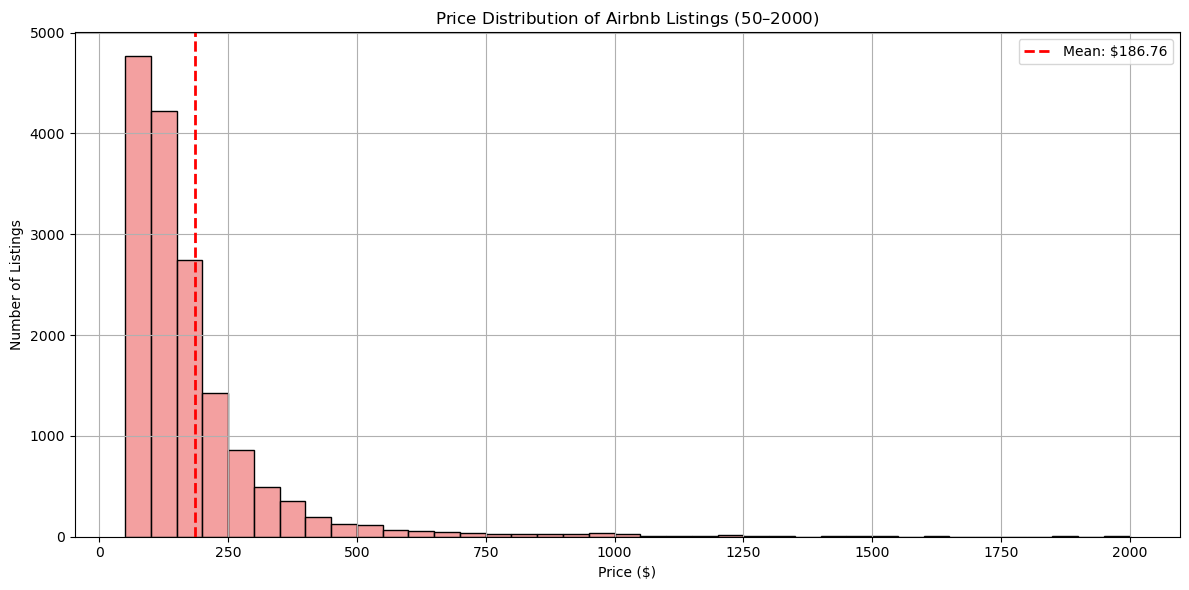

In [20]:
# Step 1: Custom bin range from $50 to $2000 in $50 steps
bins = np.arange(50, 2001, 50)

# Step 2: Mean price
mean_price = data['price'].mean()

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['price'] >= 50], x='price', bins=bins, color='lightcoral', edgecolor='black')

# Step 4: Mean line
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:.2f}')

# Step 5: Title and Labels
plt.title('Price Distribution of Airbnb Listings ($50–$2000)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

What is the distribution of Airbnb listing types (room_type) across different neighbourhood groups in New York City?"
Create a grouped bar chart using Seaborn’s countplot() to visualize the count of each room_type, separated by neighbourhood_group using hue.
Ensure the following:
Use a different color for each neighbourhood_group (via hue)
Add axis labels, legend, and a title
Plot size should be readable

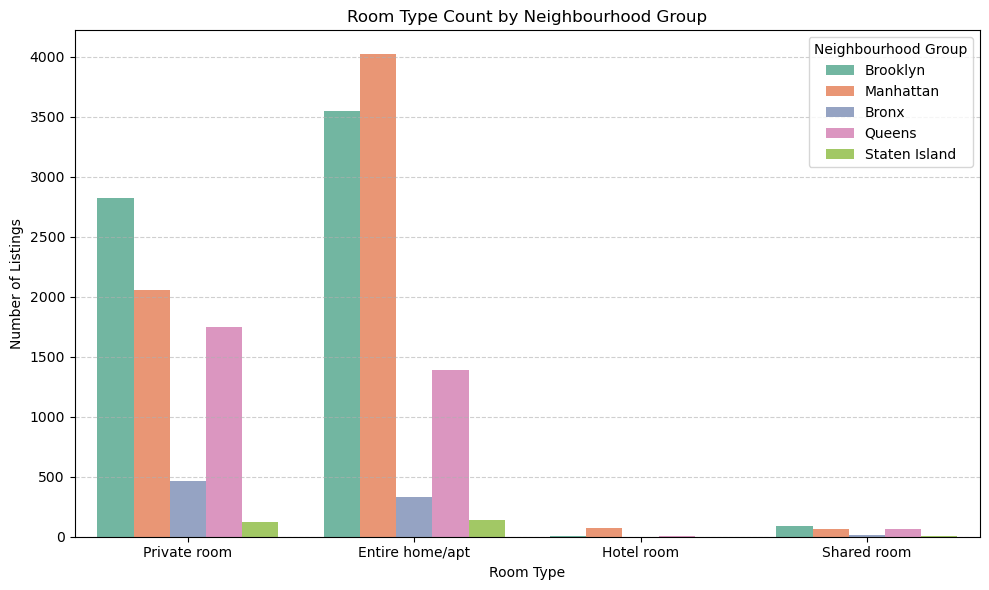

In [21]:
# Step 1: Count room types
room_counts = data['room_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='room_type', hue='neighbourhood_group', palette='Set2')

plt.title('Room Type Count by Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.legend(title='Neighbourhood Group')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [22]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,rating_numeric,bedrooms_clean,baths_clean
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.68371,-73.96461,Private room,55.0,...,0.0,0.0,No License,5,1,1,Not specified,5.00,1,NaN
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.76661,-73.98810,Entire home/apt,144.0,...,364.0,2.0,No License,4.67,2,1,1,4.67,2,1.0


## 2 Neighbourhood Group Comparison (PLOT)
Create a simple bar chart showing average price by neighbourhood_group (object). Sort bars in descending order and add value labels.

In [23]:
avg_price = data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
avg_price

neighbourhood_group
Manhattan        220.298457
Brooklyn         194.392890
Queens           128.468867
Bronx            120.537608
Staten Island    120.347490
Name: price, dtype: float64

/var/folders/n7/ks_d6ljd6nndmmybcy5v22040000gn/T/ipykernel_2299/4070589524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=avg_price.index,y=avg_price.values,palette='viridis')


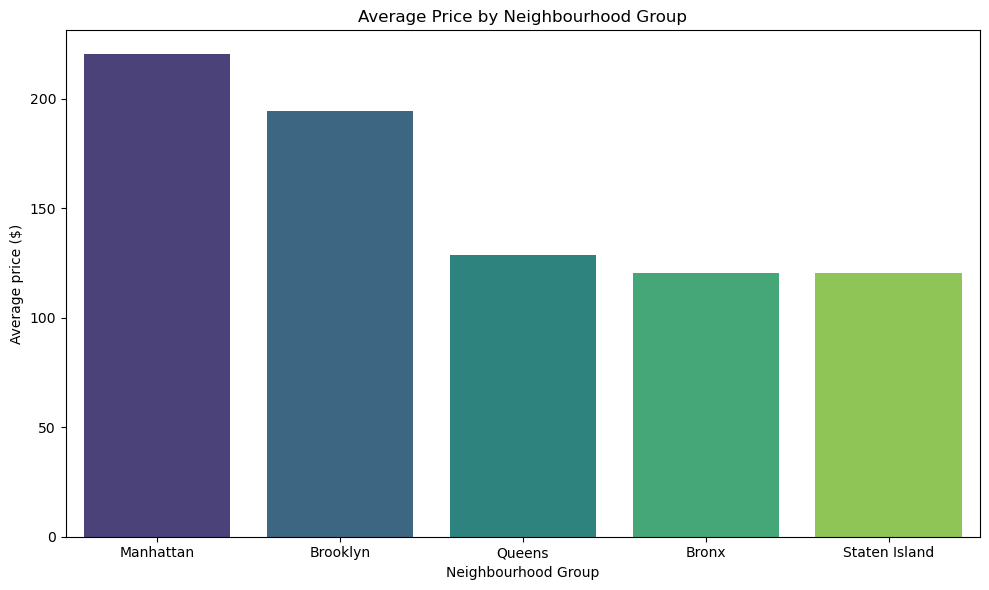

In [24]:
plt.figure(figsize=(10,6))
barplot = sns.barplot(x=avg_price.index,y=avg_price.values,palette='viridis')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average price ($)')
plt.tight_layout()
plt.show()

### 3 Price vs Reviews Correlation (PLOT)
Create scatter plot of number_of_reviews (float64) vs price (float64). Add regression line and calculate correlation coefficient. Color points by room_type.

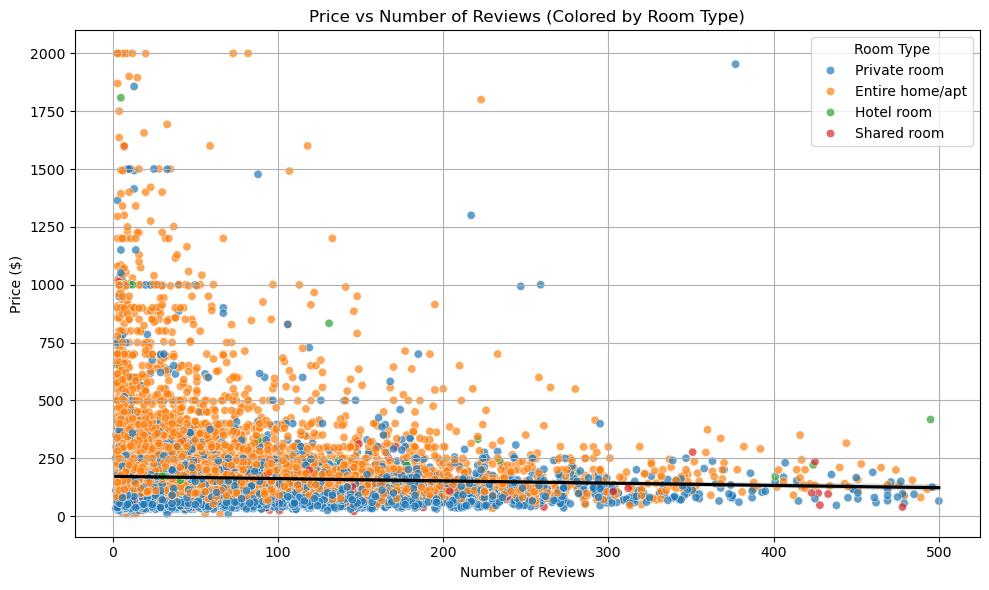

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter out outliers (optional - to keep plot readable)
filtered_data = data[(data['price'] <= 2000) & (data['number_of_reviews'] <= 500)]

# Step 2: Correlation coefficient
correlation = filtered_data['price'].corr(filtered_data['number_of_reviews'])

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='number_of_reviews', y='price', hue='room_type', alpha=0.7)

# Step 4: Regression line (lowess=True for curve fitting)
sns.regplot(data=filtered_data, x='number_of_reviews', y='price', scatter=False, color='black', line_kws={'label': f"Corr: {correlation:.2f}"})

# Step 5: Labels and title
plt.title('Price vs Number of Reviews (Colored by Room Type)')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')
plt.grid(True)
plt.tight_layout()
plt.show()


### 4 Geographic Price Distribution (PLOT)
Use latitude and longitude (float64) to create a scatter plot colored by price ranges. Create 5 price bins (Low, Medium, High, Very High,Very Expensive) and use different colors.

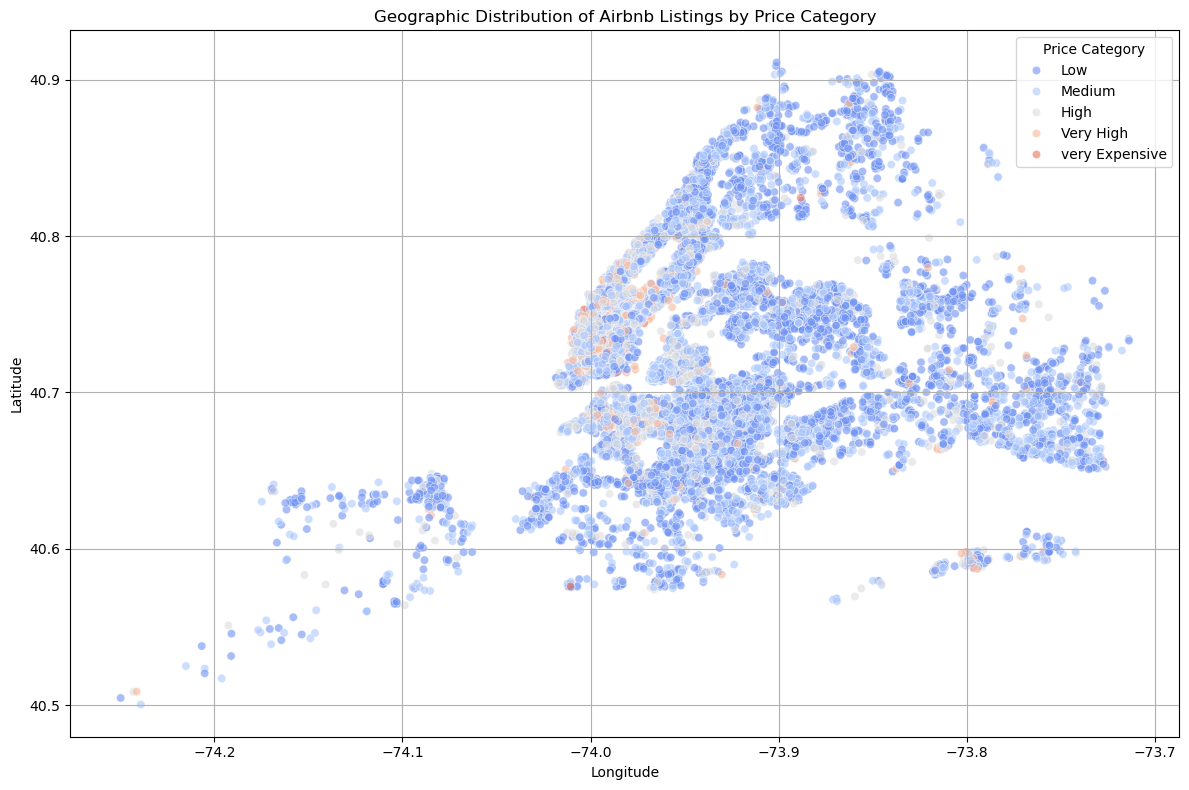

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define price bins
price_bins = [0, 100, 200, 400,1500, data['price'].max()]
price_labels = ['Low', 'Medium', 'High', 'Very High','very Expensive']

# Step 2: Create new column 'price_category'
data['price_category'] = pd.cut(data['price'], bins=price_bins, labels=price_labels)


# Step 3: Plot scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='price_category', palette='coolwarm', alpha=0.6)

plt.title('Geographic Distribution of Airbnb Listings by Price Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price Category')
plt.grid(True)
plt.tight_layout()
plt.show()


### 5 Availability Insights (PLOT)
Group by neighbourhood_group and calculate average availability_365, price, and number_of_reviews. Rank neighbourhood groups by these metrics.


In [27]:
grouped = data.groupby('neighbourhood_group')[['availability_365', 'price', 'number_of_reviews']].mean()
grouped = grouped.round(2)

In [28]:
grouped['availability_rank'] = grouped['availability_365'].rank(ascending=False)
grouped['reviews_rank'] = grouped['number_of_reviews'].rank(ascending=False)
grouped['price_rank'] = grouped['price'].rank(ascending=False)
grouped.reset_index(inplace=True)
grouped

,neighbourhood_group,availability_365,price,number_of_reviews,availability_rank,reviews_rank,price_rank
0,Bronx,241.14,120.54,41.18,1.0,5.0,4.0
1,Brooklyn,198.50,194.39,57.71,4.0,1.0,2.0
2,Manhattan,195.70,220.30,47.22,5.0,4.0,1.0
3,Queens,216.35,128.47,50.90,3.0,3.0,3.0
4,Staten Island,230.84,120.35,51.91,2.0,2.0,5.0


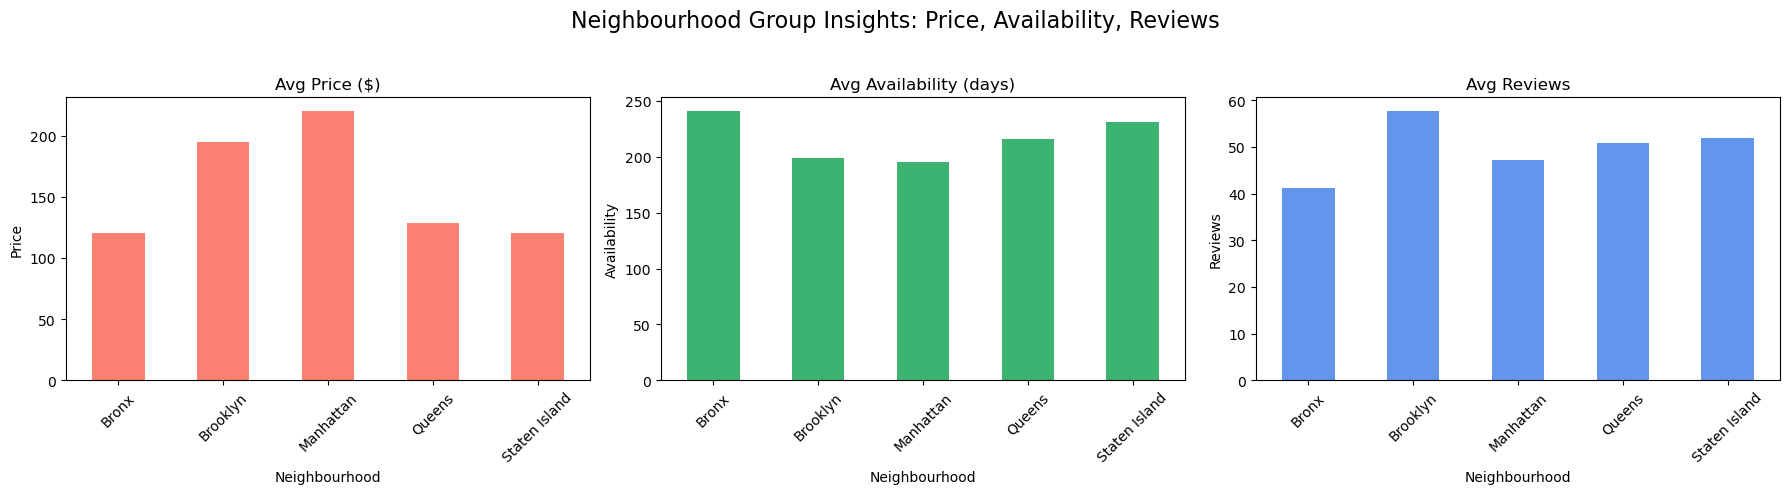

In [29]:
import matplotlib.pyplot as plt

# Create figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Neighbourhood Group Insights: Price, Availability, Reviews', fontsize=16)

# 1. Average Price
data.groupby('neighbourhood_group')['price'].mean().plot(kind='bar', ax=axes[0], color='salmon')
axes[0].set_title('Avg Price ($)')
axes[0].set_ylabel('Price')
axes[0].set_xlabel('Neighbourhood')
axes[0].tick_params(axis='x', rotation=45)

# 2. Average Availability
data.groupby('neighbourhood_group')['availability_365'].mean().plot(kind='bar', ax=axes[1], color='mediumseagreen')
axes[1].set_title('Avg Availability (days)')
axes[1].set_ylabel('Availability')
axes[1].set_xlabel('Neighbourhood')
axes[1].tick_params(axis='x', rotation=45)

# 3. Average Number of Reviews
data.groupby('neighbourhood_group')['number_of_reviews'].mean().plot(kind='bar', ax=axes[2], color='cornflowerblue')
axes[2].set_title('Avg Reviews')
axes[2].set_ylabel('Reviews')
axes[2].set_xlabel('Neighbourhood')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


### 6  Review Frequency Analysis (NO PLOT)
Create categories for reviews_per_month: 'Low' (1-3), 'Medium' (3-4), 'High' (4+). Calculate average price, availability, and total reviews for each category. Determine which category performs best.

In [30]:
rating_bins = [1,3,4,5]
rating_label = ['low','Medium','High']
data['rating_category'] = pd.cut(data['rating_numeric'],bins=rating_bins,labels=rating_label,include_lowest=True)
rating_analyst = data.groupby('rating_category').agg({
    'price': 'mean',
    'availability_365': 'mean',
    'number_of_reviews': 'mean',
    'reviews_per_month': 'mean'
}).round(2)
rating_analyst

/var/folders/n7/ks_d6ljd6nndmmybcy5v22040000gn/T/ipykernel_2299/600729382.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_analyst = data.groupby('rating_category').agg({


,price,availability_365,number_of_reviews,reviews_per_month
rating_category,,,,
low,131.40,234.23,3.91,0.30
Medium,174.49,228.30,7.56,0.63
High,187.32,202.49,53.26,1.50


In [31]:
best_rated= data.groupby('neighbourhood_group')['rating_numeric'].mean().sort_values(ascending=False)
best_rated

neighbourhood_group
Staten Island    4.776023
Brooklyn         4.773776
Queens           4.736560
Bronx            4.721171
Manhattan        4.691917
Name: rating_numeric, dtype: float64

### 7 Host Portfolio Analysis (NO PLOT)
Group by host_id and calculate: total listings per host, average price per host, total reviews per host. Identify top 20 hosts by different metrics (most listings, highest average price, most reviews).

In [32]:
host_analysis = data.groupby('host_id').agg(
    total_listings =('id','count'),
    avg_price =('price' ,'mean'),
    total_review =('number_of_reviews','sum')
).round(2)
host_analysis.head(20)

,total_listings,avg_price,total_review
host_id,,,
1678,1,189.00,21.0
2234,1,85.00,4.0
2571,1,170.00,47.0
2787,2,249.00,78.0
2845,2,240.00,52.0
4396,2,99.00,301.0
5089,1,150.00,74.0
7356,1,66.00,50.0
7450,1,144.00,60.0


In [33]:
top_hosts_by_listings = host_analysis.sort_values(by='total_listings', ascending=False).head(20)

top_hosts_by_price = host_analysis.sort_values(by='avg_price', ascending=False).head(20)

top_hosts_by_reviews = host_analysis.sort_values(by='total_review', ascending=False).head(20)


###  8 Neighbourhood Market Analysis (PLOT)
For each neighbourhood, calculate: listing count, average price, price range (max-min), market share percentage. Identify top 15 neighbourhoods by listing count and average price.

In [ ]:
neighbourhood_analysis = data.groupby('neighbourhood').agg(
    listing_count=('id','count'),
    avg_price=('price','mean'),
    max_price=('price','max'),
    min_price=('price','min')
)
neighbourhood_analysis

In [46]:
neighbourhood_analysis['price_range'] = neighbourhood_analysis['max_price'] - neighbourhood_analysis['min_price']

In [47]:
total_listings = data.shape[0]
neighbourhood_analysis['market_share_%'] = (neighbourhood_analysis['listing_count'] / total_listings * 100).round(2)

neighbourhood_analysis['avg_price'] = neighbourhood_analysis['avg_price'].round(2)
neighbourhood_analysis['price_range'] = neighbourhood_analysis['price_range'].round(2)

top_15_by_count = neighbourhood_analysis.sort_values(by='listing_count', ascending=False).head(15)

top_15_by_price = neighbourhood_analysis.sort_values(by='avg_price', ascending=False).head(15)

In [48]:
top_15_by_count

,listing_count,avg_price,max_price,min_price,price_range,market_share_%
neighbourhood,,,,,,
Bedford-Stuyvesant,1306,297.57,100000.0,10.0,99990.0,7.69
Harlem,918,151.52,2250.0,10.0,2240.0,5.41
Williamsburg,789,191.74,1002.0,10.0,992.0,4.65
Midtown,685,272.91,10000.0,38.0,9962.0,4.04
Hell's Kitchen,648,235.66,2000.0,45.0,1955.0,3.82
Bushwick,587,129.77,1500.0,18.0,1482.0,3.46
Crown Heights,581,172.01,4000.0,33.0,3967.0,3.42
Upper East Side,567,180.74,1500.0,10.0,1490.0,3.34
Upper West Side,470,230.05,3000.0,10.0,2990.0,2.77


In [49]:
top_15_by_price

,listing_count,avg_price,max_price,min_price,price_range,market_share_%
neighbourhood,,,,,,
Longwood,27,475.96,9994.0,30.0,9964.0,0.16
Civic Center,7,435.71,999.0,190.0,809.0,0.04
Theater District,92,377.51,7590.0,63.0,7527.0,0.54
Tribeca,39,359.59,1018.0,59.0,959.0,0.23
Flatiron District,31,359.19,2500.0,54.0,2446.0,0.18
Todt Hill,1,345.00,345.0,345.0,0.0,0.01
West Village,162,340.28,4929.0,39.0,4890.0,0.95
NoHo,7,330.00,995.0,95.0,900.0,0.04
SoHo,115,323.81,1500.0,70.0,1430.0,0.68


/var/folders/n7/ks_d6ljd6nndmmybcy5v22040000gn/T/ipykernel_2299/3366542802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/n7/ks_d6ljd6nndmmybcy5v22040000gn/T/ipykernel_2299/3366542802.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


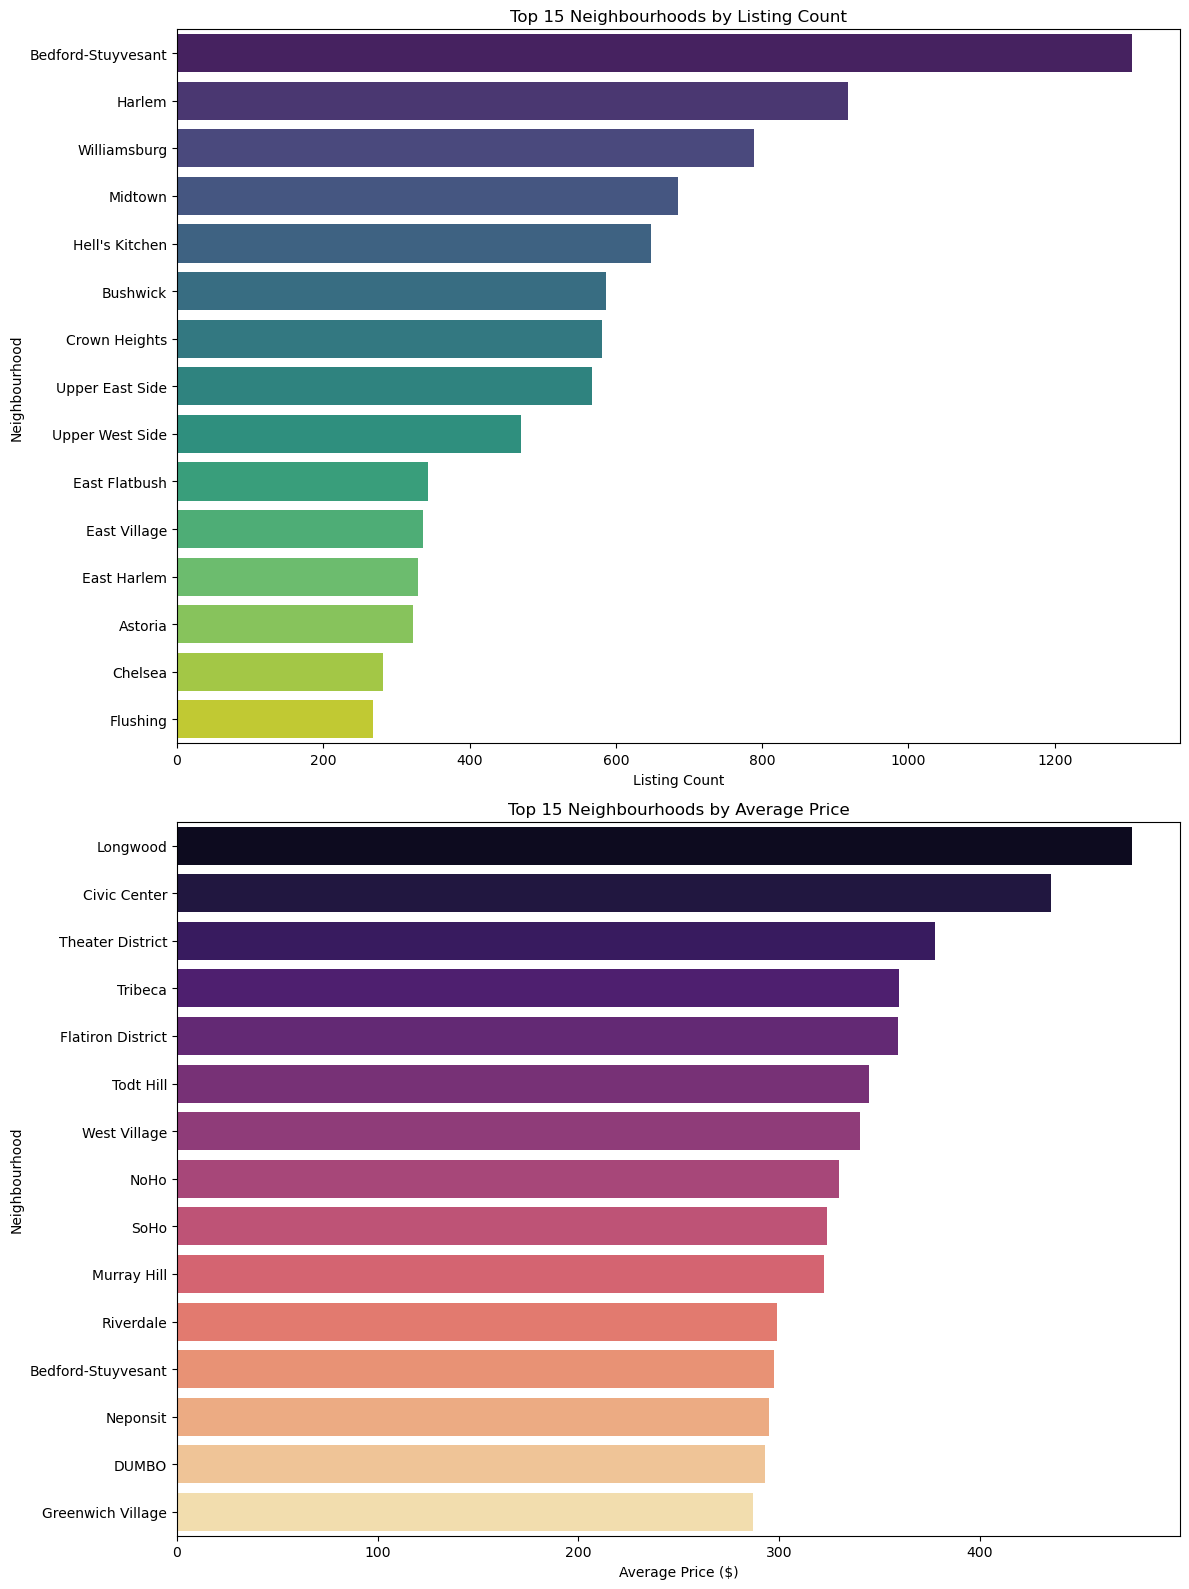

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(12, 16), sharex=False)

sns.barplot(
    data=top_15_by_count.reset_index(),
    x='listing_count', y='neighbourhood', ax=axes[0], palette='viridis'
)
axes[0].set_title('Top 15 Neighbourhoods by Listing Count')
axes[0].set_xlabel('Listing Count')
axes[0].set_ylabel('Neighbourhood')


sns.barplot(
    data=top_15_by_price.reset_index(),
    x='avg_price', y='neighbourhood', ax=axes[1], palette='magma'
)
axes[1].set_title('Top 15 Neighbourhoods by Average Price')
axes[1].set_xlabel('Average Price ($)')
axes[1].set_ylabel('Neighbourhood')

plt.tight_layout()
plt.show()


### 9. Minimum Nights Strategy Analysis (NO PLOT)
Group listings by minimum_nights ranges: 1 night, 2-3 nights, 4-7 nights, 8+ nights. Calculate average price, availability, and booking frequency (based on reviews) for each range. Determine optimal minimum nights strategy.

In [62]:
def categorize_nights(n):
    if n == 1:
        return '1 night'
    elif 2 <= n <= 3:
        return '2-3 nights'
    elif 4 <= n <= 7:
        return '4-7 nights'
    else:
        return '8+ nights'
data['min_nights_range'] = data['minimum_nights'].apply(categorize_nights)

In [64]:
strategy_df = data.groupby('min_nights_range').agg(
    avg_price=('price','mean'),
    avg_availability=('availability_365', 'mean'),
    avg_reviews=('number_of_reviews', 'mean')
).round(2)
strategy_df = strategy_df.sort_values(by='avg_reviews', ascending=False)
strategy_df

,avg_price,avg_availability,avg_reviews
min_nights_range,,,
1 night,218.00,186.64,75.37
2-3 nights,218.39,172.40,71.23
4-7 nights,225.19,173.22,62.01
8+ nights,180.93,207.68,48.00
